   OBJECTID EVENT_UNIQUE_ID             OCC_DATE OCC_MONTH    OCC_DOW  \
0         1  GO-20148000028  1/1/2014 5:00:00 AM   January  Wednesday   
1         2  GO-20148004875  1/1/2014 5:00:00 AM   January  Wednesday   
2         3  GO-20141260499  1/1/2014 5:00:00 AM   January  Wednesday   
3         4  GO-20141260663  1/1/2014 5:00:00 AM   January  Wednesday   
4         5  GO-20141261162  1/1/2014 5:00:00 AM   January  Wednesday   

   OCC_YEAR  OCC_HOUR DIVISION  FATALITIES INJURY_COLLISIONS  ...  \
0      2014        17      D53           0                NO  ...   
1      2014        14      D32           0                NO  ...   
2      2014         2      NSA           0               YES  ...   
3      2014         3      NSA           0                NO  ...   
4      2014         5      NSA           0               YES  ...   

           NEIGHBOURHOOD_158 LONG_WGS84  LAT_WGS84 AUTOMOBILE  MOTORCYCLE  \
0   Mount Pleasant East (99) -79.377616  43.701225        YES        

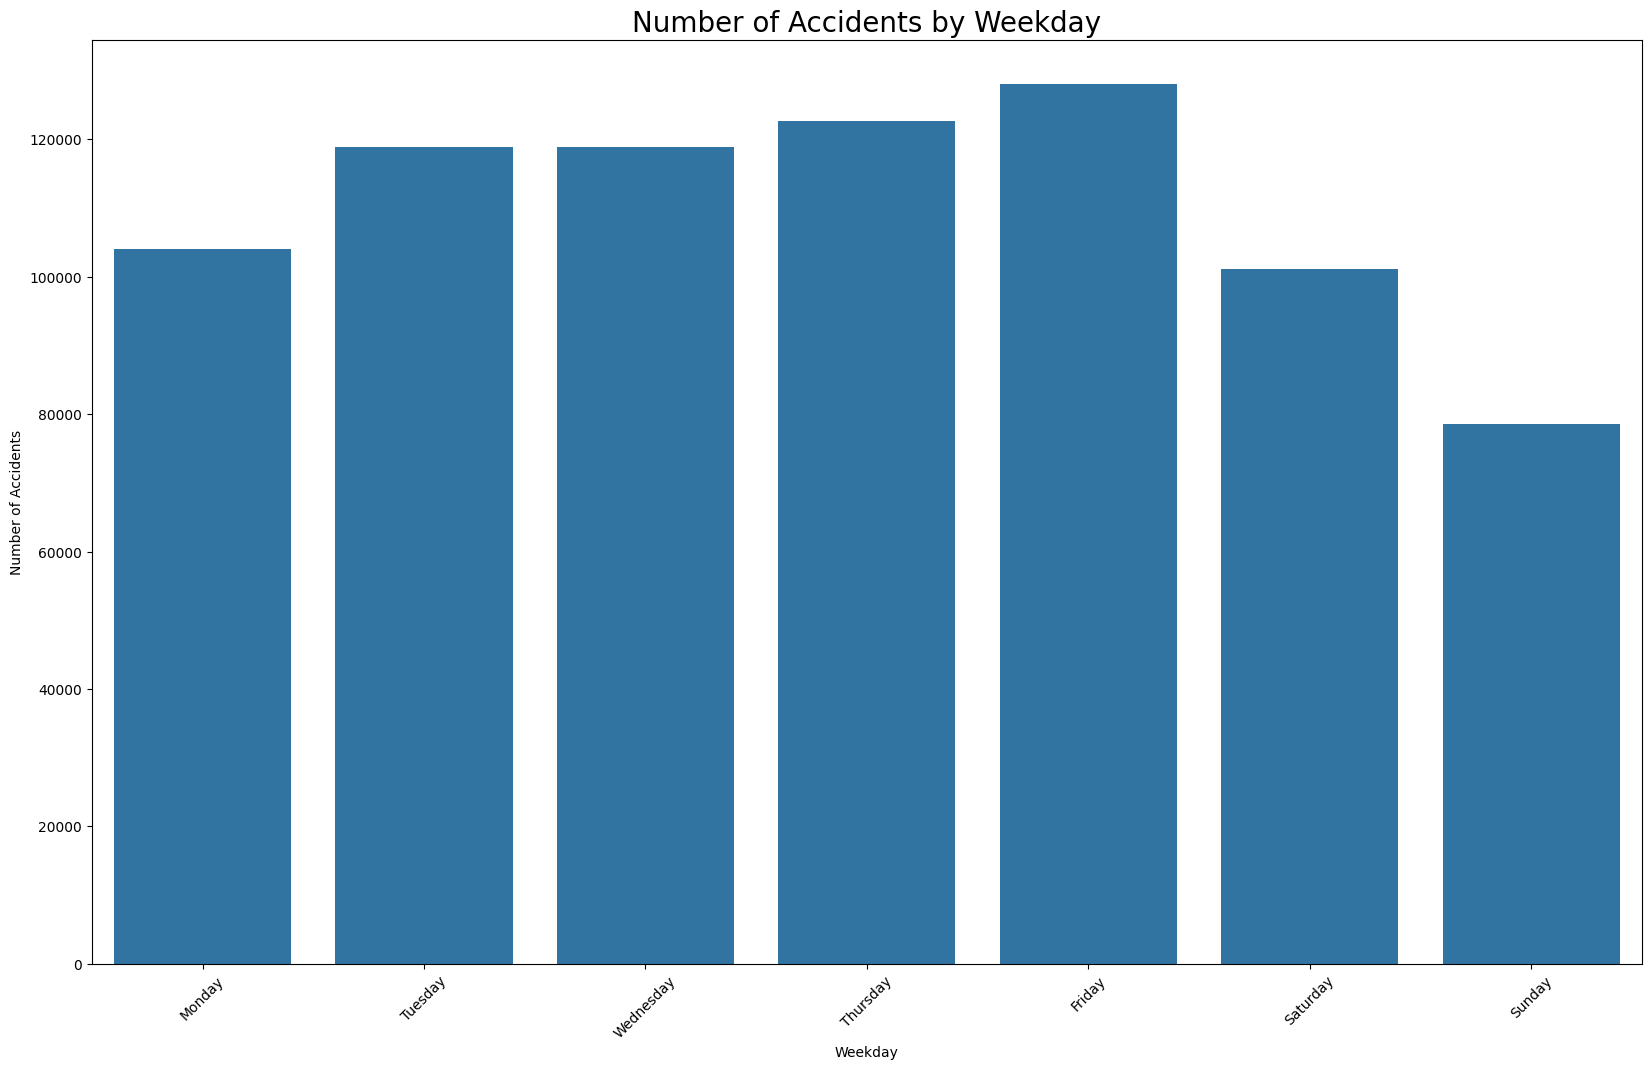

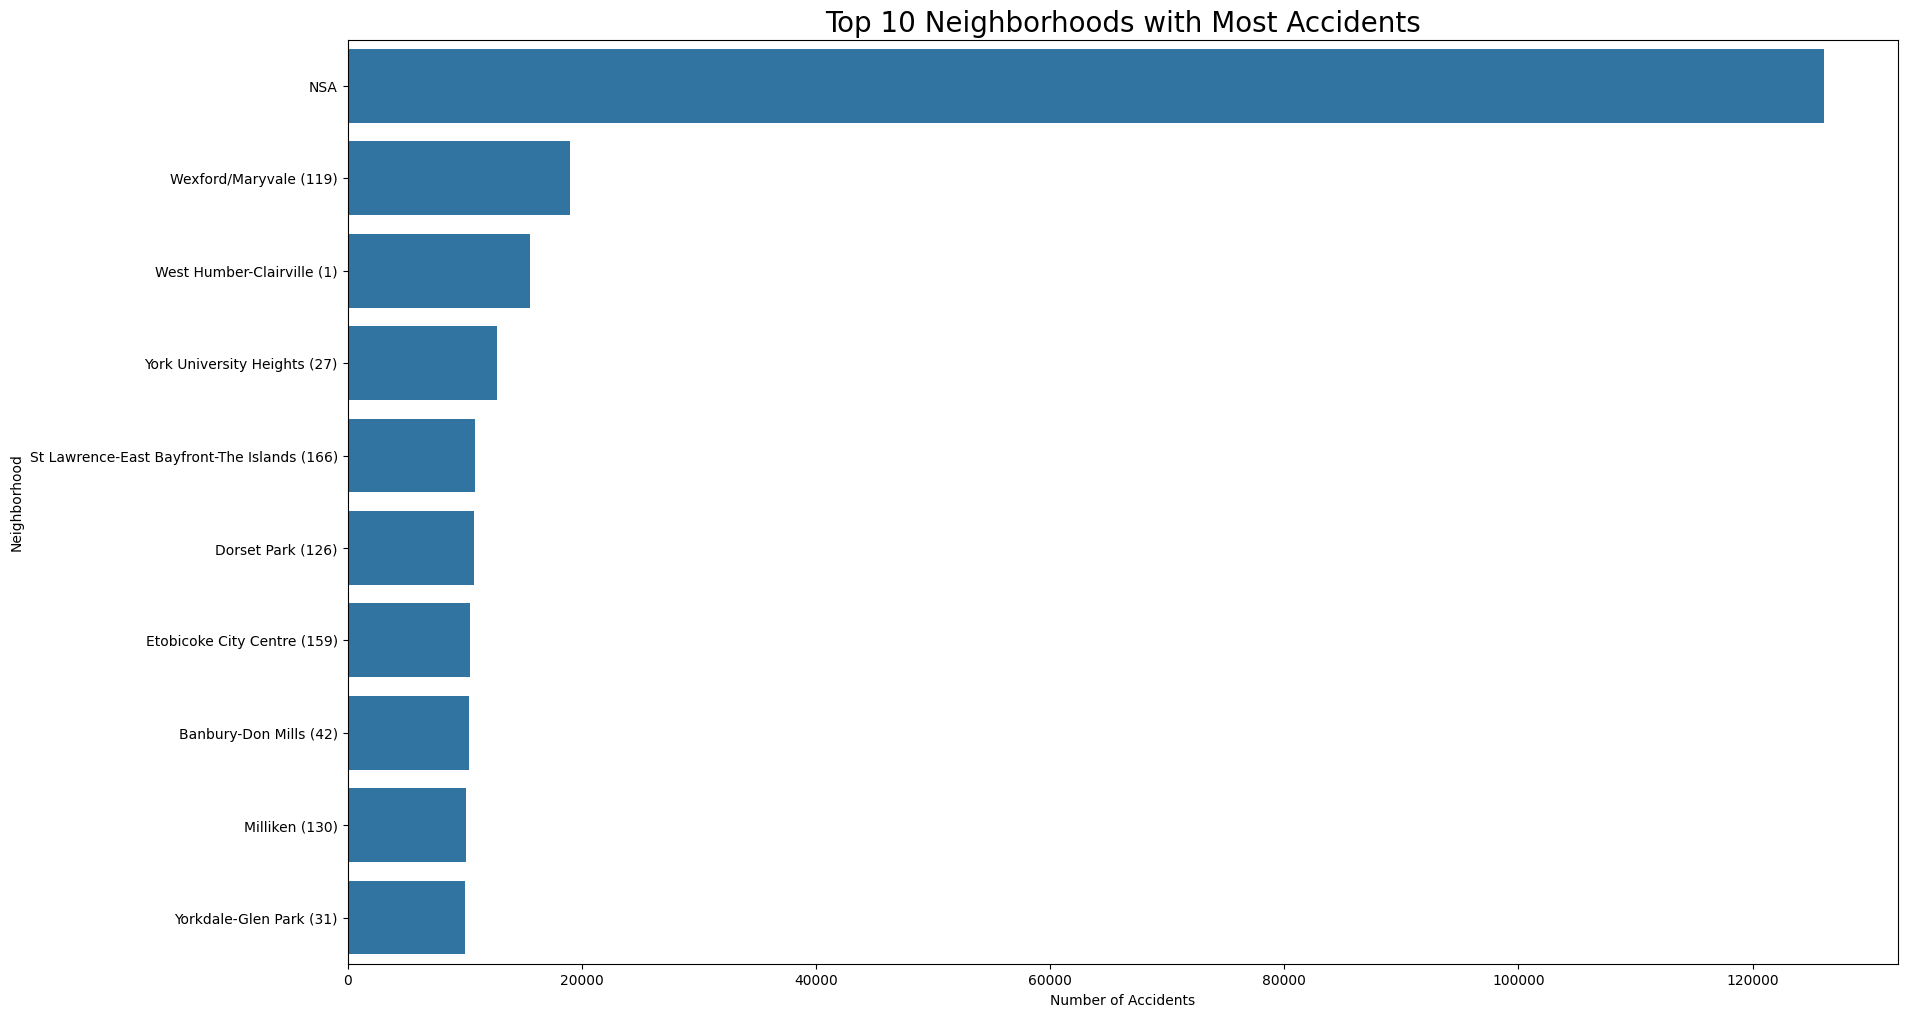

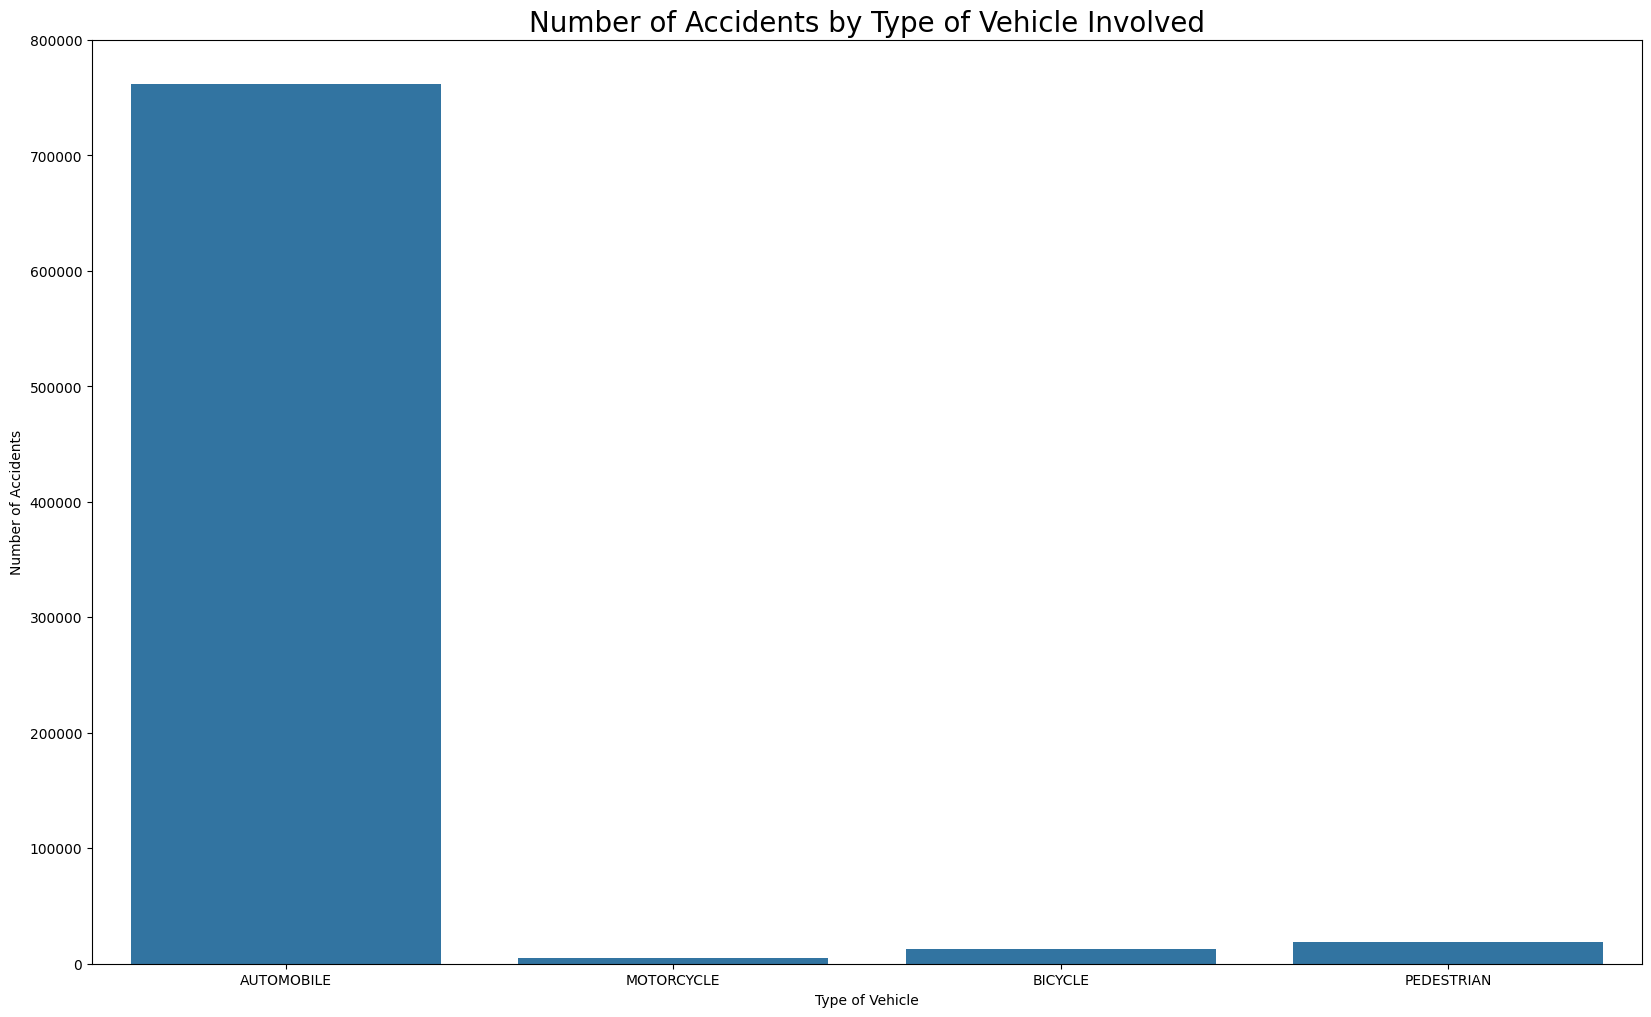

In [ ]:
import pandas as pd

df = pd.read_csv("collisions.csv")
print(df.head())
print(df.info())

df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'], errors='coerce')

df['weekday'] = df['OCC_DATE'].dt.day_name()
df['month'] = df['OCC_DATE'].dt.month
df['year'] = df['OCC_DATE'].dt.year
df['hour'] = df['OCC_DATE'].dt.hour

print(df[['OCC_DATE', 'weekday', 'month', 'year', 'hour']].head())

df = df.dropna(subset=['OCC_DATE'])
print(df.info())

# Accidents by weekday
accidents_by_weekday = df['weekday'].value_counts().sort_index()
print(accidents_by_weekday)

# Top Neighborhoods with most accidents
top_neighborhoods = df['NEIGHBOURHOOD_158'].value_counts().head(10)
print(top_neighborhoods)


import matplotlib.pyplot as plt
import seaborn as sns

# Plot accidents by weekday
plt.figure(figsize=(20,12))
sns.countplot(data=df, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Accidents by Weekday', fontsize=20)   
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Number of Accidents', fontsize=10)
plt.xticks(rotation=45)
plt.show()

# Plot top neighborhoods with most accidents
plt.figure(figsize=(20,12))
sns.countplot(data=df, y='NEIGHBOURHOOD_158', order=top_neighborhoods.index)
plt.title('Top 10 Neighborhoods with Most Accidents', fontsize=20)
plt.xlabel('Number of Accidents', fontsize=10)
plt.ylabel('Neighborhood', fontsize=10)
plt.show()


# Plot accidents by type of vehicle
vehicle_cols = ['AUTOMOBILE', 'MOTORCYCLE', 'BICYCLE', 'PEDESTRIAN']
vehicle_type_counts = {col: df[col].value_counts().get('YES', 0) for col in vehicle_cols}

plt.figure(figsize=(20,12))
sns.barplot(x=list(vehicle_type_counts.keys()), y=list(vehicle_type_counts.values()))
plt.title('Number of Accidents by Type of Vehicle Involved', fontsize=20)
plt.xlabel('Type of Vehicle', fontsize=10)
plt.ylabel('Number of Accidents', fontsize=10)
plt.show()


import folium 

tornto_map = folium.Map(location=[43.65107, -79.347015], zoom_start=12)

for idx,row in df.iterrows():
    if  row ['LAT_WGS84']!=0 and row['LONG_WGS84']!=0:
        folium.CircleMarker(
            location=[row['LAT_WGS84'], row['LONG_WGS84']],
            radius=2,
            color='red',
            fill=True,
            fill_color='red',
        ).add_to(tornto_map)


# Save the map to an HTML file
tornto_map.save("toronto_accidents_map.html")

